# BAIS 6040 Data Programming in Python

## Spring 2021

## Week 9 Homework

## Group 3: Jared Barkley, Tyler Zaruba, Netaji Boggarapu, Michael Noonan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
compiledcountydata_dir = "https://raw.githubusercontent.com/jaredbarkley0/PythonGroupProject/master/MN%20County%20Data_032721.csv"
compiledcountydata = pd.read_csv(compiledcountydata_dir)
compiledcountydata

,Unnamed: 0,County,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home
0,0,Aitkin,1191,33,15870.0,0.075047,8.0,2.097233,254.0,118.0,4.0,0.099076,29.500000
1,1,Anoka,33391,390,362648.0,0.092076,753.9,2.712716,3753.0,1675.0,35.0,0.050163,47.857143
2,2,Becker,3131,42,34545.0,0.090635,22.8,2.393929,477.0,294.0,8.0,0.093900,36.750000
3,3,Beltrami,3386,51,47184.0,0.071762,14.8,2.487013,1990.0,264.0,11.0,0.077968,24.000000
4,4,Benton,4482,90,40895.0,0.109598,94.4,2.426614,1050.0,557.0,11.0,0.124275,50.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,Watonwan,1176,8,10923.0,0.107663,25.4,2.397507,151.0,36.0,3.0,0.030612,12.000000
83,83,Wilkin,677,11,6226.0,0.108738,8.7,2.238850,152.0,36.0,2.0,0.053176,18.000000
84,84,Winona,4193,49,50830.0,0.082491,79.9,2.352632,3855.0,277.0,9.0,0.066062,30.777778
85,85,Wright,12554,116,138531.0,0.090622,178.3,2.796739,1158.0,687.0,20.0,0.054724,34.350000


In [3]:
# Check info on dataframe
compiledcountydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        87 non-null     int64  
 1   County                            87 non-null     object 
 2   Total Positive Cases              87 non-null     int64  
 3   Total Deaths                      87 non-null     int64  
 4   Population                        87 non-null     float64
 5   Rate of Infection                 87 non-null     float64
 6   Pop Density                       87 non-null     float64
 7   Mean Household Size               87 non-null     float64
 8   Congregate Living Population      87 non-null     float64
 9   No. of Cases in Nursing Homes     87 non-null     float64
 10  No. of Nursing Homes in County    87 non-null     float64
 11  Nursing Home Cases, % of Total    87 non-null     float64
 12  Cases per 

In [4]:
compiledcountydata.describe()

,Unnamed: 0,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home
count,87.000000,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,43.000000,5596.896552,74.954023,6.529123e+04,0.090689,123.595402,2.377683,1516.241379,387.057471,12.275862,0.078468,25.305158
std,25.258662,12776.366482,196.143926,1.593879e+05,0.019710,399.364804,0.178347,3632.215103,901.265807,20.907710,0.038908,12.360818
min,0.000000,118.000000,0.000000,3.263000e+03,0.021604,1.600000,1.999631,12.000000,0.000000,0.000000,0.000000,0.000000
25%,21.500000,997.000000,14.000000,1.077750e+04,0.078862,13.850000,2.256933,199.000000,85.500000,4.000000,0.052831,18.000000
50%,43.000000,2097.000000,28.000000,2.197600e+04,0.089838,25.400000,2.363005,374.000000,165.000000,7.000000,0.073751,24.761905
75%,64.500000,4008.500000,50.500000,4.419800e+04,0.100678,57.850000,2.454706,1111.500000,320.500000,11.500000,0.100284,33.038462
max,86.000000,101110.000000,1588.000000,1.279981e+06,0.176147,3064.900000,2.900663,26867.000000,7457.000000,168.000000,0.242054,65.857143


In [5]:
#Define a function for examining relationships between two variables

def twovariablelinreg(dataframe,xvar,yvar):
    columns = xvar
    target = yvar
    
    X = dataframe[[columns]]
    y = dataframe[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"The score of my two-variable linear regression is {lr.score(X_test, y_test)}")
    print(f'My R-squared value is {lr.score(X_test, y_test)}')
    print(f'My slope coefficients are {lr.coef_}')
    print(f'My intercept is {lr.intercept_}')
    ypred = lr.predict(X)
    fig, ax = plt.subplots(figsize = (6,6))
    plt.scatter(X, ypred, color='purple')
    plt.scatter(X,y, color='green')
    ax.set(title = f'{yvar} by {xvar}', xlabel = xvar, ylabel=yvar)
    plt.show

# Section 1

## Investigation of individual variables to try to identify base correlations
## Interested in Total Positive Cases, Rate of Infection, and Total Deaths as possible targets

The score of my two-variable linear regression is 0.0036079248090240545
My R-squared value is 0.0036079248090240545
My slope coefficients are [[-5.03012188e-06]]
My intercept is [0.09122743]


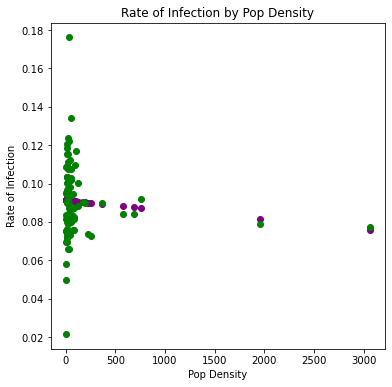

In [6]:
# Assign columns of interest and target value

twovariablelinreg(compiledcountydata,'Pop Density','Rate of Infection')

## Population Density appears to have no correlation to Rate of Infection, confirmed by linear regression analysis and graph

The score of my two-variable linear regression is 0.6709833111167329
My R-squared value is 0.6709833111167329
My slope coefficients are [[3.15669637]]
My intercept is [561.57892666]


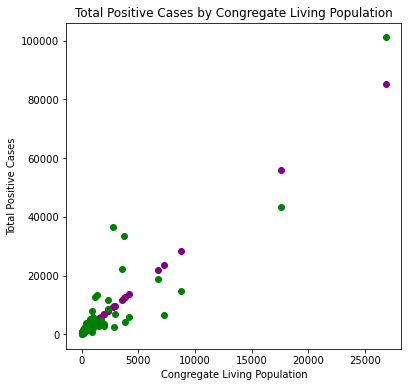

In [7]:
twovariablelinreg(compiledcountydata,'Congregate Living Population','Total Positive Cases')

### Congregate Living population appears to correlate with total number of infections positively

The score of my two-variable linear regression is -0.02340374959222835
My R-squared value is -0.02340374959222835
My slope coefficients are [[0.01865045]]
My intercept is [0.04614126]


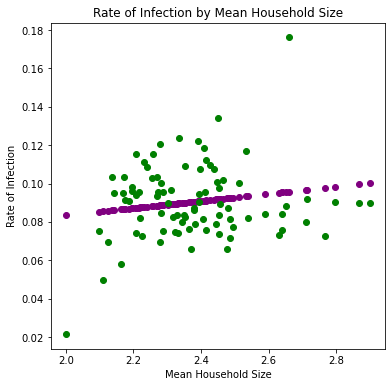

In [8]:
twovariablelinreg(compiledcountydata,'Mean Household Size', 'Rate of Infection')

The score of my two-variable linear regression is 0.14545631605207032
My R-squared value is 0.14545631605207032
My slope coefficients are [[20727.80361536]]
My intercept is [-42944.88636043]


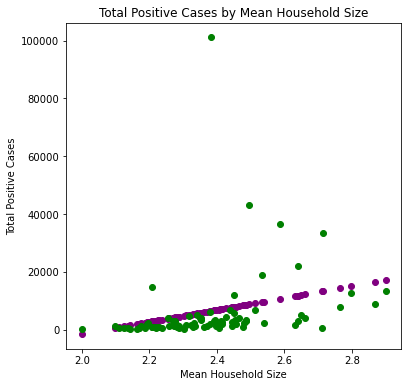

In [9]:
twovariablelinreg(compiledcountydata,'Mean Household Size', 'Total Positive Cases')

The score of my two-variable linear regression is 0.001639278164279001
My R-squared value is 0.001639278164279001
My slope coefficients are [[-4.25292258e-07]]
My intercept is [0.09129799]


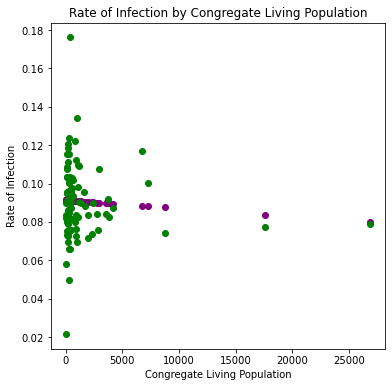

In [10]:
twovariablelinreg(compiledcountydata, 'Congregate Living Population', 'Rate of Infection')

The score of my two-variable linear regression is 0.0057197933979681315
My R-squared value is 0.0057197933979681315
My slope coefficients are [[-1.23449966e-08]]
My intercept is [0.09143822]


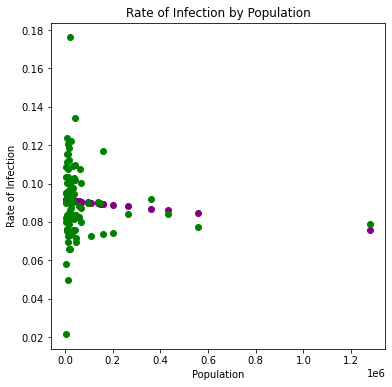

In [11]:
twovariablelinreg(compiledcountydata,"Population","Rate of Infection")

The score of my two-variable linear regression is 0.818931588230303
My R-squared value is 0.818931588230303
My slope coefficients are [[0.00122499]]
My intercept is [-3.71201596]


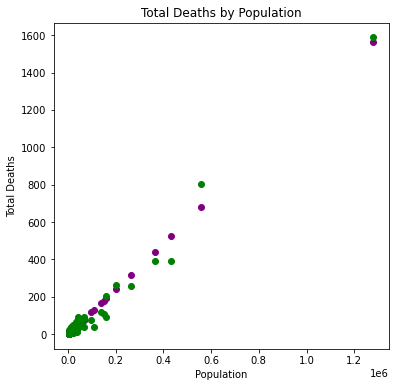

In [12]:
twovariablelinreg(compiledcountydata,'Population', 'Total Deaths')

# Section 2, multiple linear regression

In [13]:
# Create function for linear regression that accepts X and y, X & y defined outside of function
# Need help defining a function that needs a list as a variable

def linreg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"The score of my two-variable linear regression is {lr.score(X_test, y_test)}")
    print(f'My R-squared value is {lr.score(X_test, y_test)}')
    print(f'My slope coefficients are {lr.coef_}')
    print(f'My intercept is {lr.intercept_}')

In [20]:
# Population density correlates highly to total number of positive cases, but not to actual rate of infection
# Suggests that living in a dense area alone likely does not increase changce of death

columns = ["Pop Density","Mean Household Size","Nursing Home Cases, % of Total","Congregate Living Population"]
target = "Rate of Infection"
X = compiledcountydata[columns]
y = compiledcountydata[target]

linreg(X,y)

The score of my two-variable linear regression is 0.21215995930196463
My R-squared value is 0.21215995930196463
My slope coefficients are [-9.69388433e-06  3.52371568e-02  1.29509205e-01  3.83591182e-07]
My intercept is -0.0032880001833557743


In [15]:
columns = ['Mean Household Size','Congregate Living Population','Nursing Home Cases, % of Total']
target = 'Total Deaths'
X = compiledcountydata[columns]
y = compiledcountydata[target]

linreg(X,y)

The score of my two-variable linear regression is 0.6904991159340809
My R-squared value is 0.6904991159340809
My slope coefficients are [6.90412293e+01 5.06267560e-02 2.74829863e+02]
My intercept is -192.13143052652376


In [16]:
#Population density is a good predictor for total positive cases, but I suspect high multicollinearity between pop density
# and total positive cases.

columns = ["Pop Density","Mean Household Size"]
target = "Total Positive Cases"
X = compiledcountydata[columns]
y = compiledcountydata[target]

linreg(X,y)

The score of my two-variable linear regression is 0.879725585090254
My R-squared value is 0.879725585090254
My slope coefficients are [  25.07312515 6024.74993401]
My intercept is -11512.791403486617


In [17]:
# Example with Lasso

In [18]:
# Define a function for lasso analysis

def lassoreg(X,y):
    clf= Lasso(alpha=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    clf.fit(X_train, y_train)
    print(f"My score for this lasso is {clf.score(X_test, y_test)}")

In [19]:
lassoreg(X,y)

My score for this lasso is 0.8797312236572933
